In [5]:
!pip install EbookLib
!pip install bs4


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [6]:
import re
import ebooklib
from ebooklib import epub

ebub_file = "//home/chris/Calibre Library/Gene Kim/The Phoenix Project (295)/The Phoenix Project - Gene Kim.epub"

book = epub.read_epub(ebub_file)

In [8]:
chapters = list(book.get_items_of_type(ebooklib.ITEM_DOCUMENT))

In [9]:
from bs4 import BeautifulSoup
def chapter_to_str(chapter):
    soup = BeautifulSoup(chapter.get_body_content(), 'html.parser')
    text = [para.get_text() for para in soup.find_all('p')]
    return ' '.join(text)

In [87]:
chapter_texts = {}
for c in chapters:
    chapter_texts[c.get_name()] = chapter_to_str(c)

In [258]:
#chapter_texts

In [13]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package words to /home/chris/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/chris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
english_words = nltk.corpus.words.words()

In [89]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [227]:
#from nltk.stem import WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(tag):
    if tag[0] == 'J':
        return wordnet.ADJ
    if tag[0] == 'V':
        return wordnet.VERB
    if tag[0] == 'N':
        return wordnet.NOUN
    if tag[0] == 'R':
        return wordnet.ADV
    return wordnet.NOUN

def is_good(word):
    if len(word) < 3:
        return False
    if word in stop_words:
        return False
    if not re.match("^[a-z]+[a-zàèìòùáéíóú\-]+[a-zàèìòùáéíóú]$", word):
        return False
    return True


true_pos = ['NNPS', 'NN', 'JJ', 'VBN', 'VBZ', 'VB', 'NNS', 'VBP', 'VBD', 'VBG', 'RB', 'RBR', 'JJR', 'WRB', 'JJS']

words = []

lemmatizer = WordNetLemmatizer()

for _, text in chapter_texts.items():
    #if _ == "07-Ch01.xhtml":
    #    continue
    sentences = sent_tokenize(text)
    for sentence in sentences:
        pos_info = nltk.pos_tag(nltk.word_tokenize(sentence))
        for p in pos_info:
            main_pos = get_wordnet_pos(p[1])
            if p[1] in true_pos:
                lemma = lemmatizer.lemmatize(p[0], main_pos)
                word = lemma.lower()
                if is_good(word):
                    words.append(word)

In [245]:
#nltk.pos_tag(nltk.word_tokenize("As the meeting adjourns, I ask Wes to stay behind."))

In [228]:
# (56582, 6234)
len(words), len(list(set(words)))

(56582, 6234)

In [184]:
#for k in pp:
#    pp[k] = list(set(pp[k]))

In [141]:
#POS keys to be ignored: ',', 'DT', 'IN', 'CC', 'CD', '.', 'TO', ':', 'PRP$', 'PRP', '(', ')', '$', 'RP','WP', 'MD',
# 'WDT', '#', 'EX', 'UH', 'PDT', 'RBS', "''", 'FW', 'WP$', 'POS', '``'
# maybe: NNP
# no: NNPS, NN, JJ, VBN, VBZ, VB, NNS, VBP, VBD, VBG, RB, RBR, JJR, WRB, JJS

#pp.keys():
#['DT', 'NNP', 'IN', ',', 'CC', 'CD', 'NNPS', '.', 'NN', 'JJ', 'VBN', 'VBZ', 'VB', 'NNS', 'TO', 'VBP', ':', 
# 'PRP$', 'VBD', 'VBG', 'PRP', '(', ')', '$', 'RB', 'RP', 'WP', 'MD', 'RBR', 'WDT', 'JJR', '#', 'WRB', 'EX', 
# 'JJS', 'UH', 'PDT', 'RBS', "''", 'FW', 'WP$', 'POS', '``']

In [200]:
freq_words = nltk.FreqDist(lemmatize(words)) 

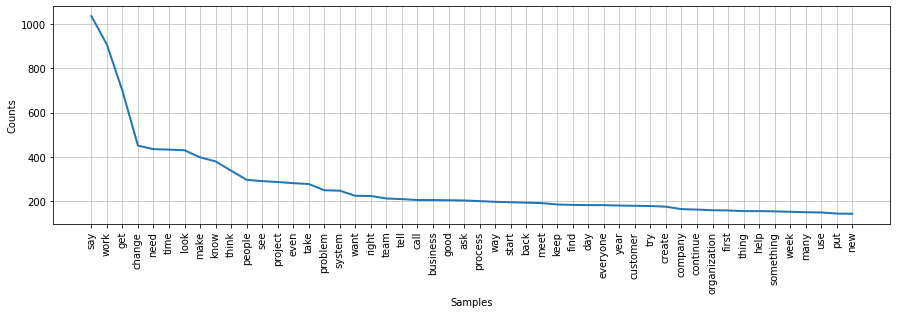

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))  # the size you want
freq_words.plot(50, cumulative=False)

In [232]:
unique_words = list(set(words))

In [233]:
from nltk.corpus import words
basic_english_words = words.words('en-basic')

In [234]:
uncommon_words = list(filter(lambda x: x not in basic_english_words, unique_words))

In [235]:
len(uncommon_words)

5607

In [236]:
uncommon_words.sort()

In [237]:
with open("uncommon_words.txt", 'w') as f:
    for uc in uncommon_words:
        f.write(f"{uc}\n")

In [203]:
# words not found in englis_words
for uw in unique_words:
    if uw not in english_words:
        print(uw)

consolidating
troubleshoot
end-to-end
self-service
widget
reserving
jour
fire-sale
ten-minute
fifty-nine
healthcare
infosec
hr-trained
straightjacket
accidents
self-organize
fax
dysfunctions
breathtaking
badgering
consultancy
risk-adjusted
responsibilities
backpack
gazillion
well-formed
doomed
dead-on
senseis
metaphors
drop-down
soonest
well-being
high-level
horrifying
antifragility
acl
changeover
non-phoenix
ciso
self-motivated
defcon
predefining
self-serviced
adrian
darkens
needed
twenty-plus
marketplace
voilà
post-mortem
high-visibility
prioritized
usb
lecturing
read-only
safer
business-impacting
tsk-tsk
gravitas
occurs
automated
pleased
birds-eye
estimated
skus
it-related
means
minimized
coordinate
kanban
challenging
banks
startup
fifty-five
events
prioritization
packed
screwup
undertakes
algorithms
singer-songwriter
scanned
well-oiled
virtualized
disappears
ping-pong
dry-mouthed
performace
resourced
reevaluate
upgrading
worthwhile
rotc
showstopper
firefighting
epiphany
toolkit
run

scheduling
risk-taker
empty-handed
delayed
scoping
investing
anti-work
sales
remediate
cerias
eight-year-old
one-line
stand-up
pos
co-authors
racehorse
workload
assembling
acts
stacy
paige
writes
stand-ups
nailed
onboard
jeez
hundreds
outsourcers
architecting
startled
multidisciplinary
disruptions
reorg-anizing
attendee
kid
work-related
voicemail
firmware
no-nonsense
three-week
redraws
relaxing
hourlies
alcoans
asks
change-related
blearily
priorities
tightly-coupled
things
proposing
ever-longer
cobol
mainframe
download
expediters
mirroring
adapted
co-inventor
demeaning
defining
like-minded
hollering
successes
technologies
using
costs
recalling
man-weeks
work-products
inspires
swears
over-scoped
eliminating
backstabbing
logs
on-call
crm
commoditization
strong-arming
thirty-second
multibillion
man-years
iterating
networking
groundbreaking
feels
stairwell
leaders
cash-flow
beep
robotic
downtime
thumbs-up
start-up
clueless
buying
production-like
triple-charging
shortcut
neverending
reactor

In [250]:
# print words appearing at most 3 times
list(filter(lambda x: freq_words[x]<2, freq_words.keys()))

['copyright',
 'selection',
 'retirement',
 'tumble',
 'outmaneuver',
 'arch',
 'rival',
 'instantly',
 'institutional',
 'reconfigure',
 'turbulent',
 'doctor',
 'toddler',
 'cough',
 'intermittent',
 'turf',
 'cajole',
 'breezily',
 'unparalleled',
 'customize',
 'mud',
 'leapfrog',
 'ballistic',
 'music',
 'competitiveness',
 'hill',
 'nicely',
 'classy',
 'dingy',
 'dank',
 'nurse',
 'critically',
 'loom',
 'rehabilitation',
 'sensitivity',
 'banter',
 'grace',
 'numbly',
 'subspace',
 'clockwork',
 'acronym',
 'seniority',
 'inherently',
 'powerpoints',
 'hr-trained',
 'voluntary',
 'whack',
 'goon',
 'fetch',
 'briskly',
 'construct',
 'cigar',
 'vanquish',
 'cheerfulness',
 'flesh',
 'ex-boss',
 'persian',
 'sculpture',
 'propeller',
 'uniform',
 'tropical',
 'insignia',
 'lapel',
 'flat',
 'superbly',
 'brisk',
 'businesslike',
 'cocky',
 'eighteen-year-old',
 'straighten',
 'coddle',
 'politician',
 'howl',
 'pragmatic',
 'edict',
 'decline',
 'backpeddle',
 'flood',
 'glorify

In [251]:
freqs = {}
for word,freq in freq_words.items():
    if freq in freqs:
        freqs[freq] += 1
    else:
        freqs[freq] = 1

In [252]:
freqs

{1: 2279,
 12: 72,
 70: 4,
 6: 158,
 2: 833,
 224: 1,
 5: 204,
 44: 6,
 3: 462,
 74: 4,
 75: 4,
 41: 7,
 9: 88,
 7: 133,
 11: 52,
 29: 17,
 4: 293,
 15: 48,
 22: 24,
 17: 22,
 18: 26,
 19: 23,
 113: 1,
 40: 6,
 66: 2,
 28: 14,
 181: 1,
 63: 4,
 165: 1,
 27: 17,
 55: 5,
 8: 110,
 13: 49,
 48: 6,
 128: 3,
 183: 2,
 163: 1,
 25: 11,
 180: 1,
 435: 1,
 21: 24,
 54: 5,
 35: 14,
 136: 2,
 51: 5,
 76: 1,
 116: 3,
 151: 1,
 38: 8,
 24: 17,
 16: 39,
 206: 2,
 69: 3,
 60: 4,
 92: 1,
 159: 1,
 451: 1,
 10: 74,
 47: 7,
 23: 24,
 138: 2,
 398: 1,
 46: 5,
 433: 1,
 1034: 1,
 126: 2,
 52: 7,
 97: 2,
 14: 60,
 72: 4,
 42: 2,
 50: 10,
 179: 1,
 186: 1,
 32: 6,
 250: 1,
 64: 3,
 26: 9,
 67: 1,
 53: 4,
 83: 2,
 282: 1,
 111: 3,
 89: 4,
 297: 1,
 59: 3,
 20: 28,
 36: 7,
 33: 6,
 192: 1,
 205: 1,
 30: 9,
 45: 5,
 85: 3,
 91: 3,
 225: 1,
 115: 2,
 68: 3,
 210: 1,
 43: 7,
 58: 4,
 338: 1,
 430: 1,
 194: 1,
 80: 4,
 143: 1,
 144: 1,
 31: 11,
 906: 1,
 101: 3,
 49: 4,
 698: 1,
 110: 4,
 37: 5,
 278: 1,
 184: 1

In [253]:
for k in sorted(freqs):
    print (f"{k}: {freqs[k]}")

1: 2279
2: 833
3: 462
4: 293
5: 204
6: 158
7: 133
8: 110
9: 88
10: 74
11: 52
12: 72
13: 49
14: 60
15: 48
16: 39
17: 22
18: 26
19: 23
20: 28
21: 24
22: 24
23: 24
24: 17
25: 11
26: 9
27: 17
28: 14
29: 17
30: 9
31: 11
32: 6
33: 6
34: 9
35: 14
36: 7
37: 5
38: 8
39: 3
40: 6
41: 7
42: 2
43: 7
44: 6
45: 5
46: 5
47: 7
48: 6
49: 4
50: 10
51: 5
52: 7
53: 4
54: 5
55: 5
56: 3
57: 5
58: 4
59: 3
60: 4
61: 3
62: 6
63: 4
64: 3
65: 2
66: 2
67: 1
68: 3
69: 3
70: 4
71: 2
72: 4
73: 3
74: 4
75: 4
76: 1
77: 2
78: 2
79: 2
80: 4
81: 4
82: 2
83: 2
84: 2
85: 3
86: 2
87: 2
88: 1
89: 4
91: 3
92: 1
93: 1
94: 3
95: 4
97: 2
98: 1
100: 2
101: 3
102: 2
103: 2
104: 1
105: 1
106: 1
107: 1
108: 3
109: 1
110: 4
111: 3
112: 1
113: 1
114: 1
115: 2
116: 3
118: 1
120: 1
123: 2
124: 1
126: 2
128: 3
130: 1
132: 2
136: 2
137: 1
138: 2
143: 1
144: 1
145: 1
150: 1
151: 1
153: 1
155: 1
156: 2
159: 1
160: 1
163: 1
165: 1
176: 1
179: 1
180: 1
181: 1
183: 2
184: 1
186: 1
192: 1
194: 1
196: 1
198: 1
201: 1
204: 1
205: 1
206: 2
210: 1
2

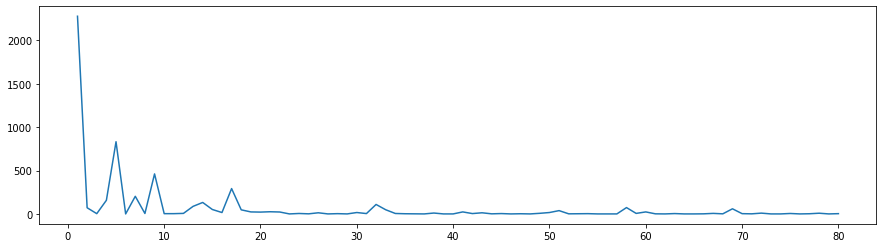

In [254]:
plt.figure(figsize=(15, 4))  # the size you want
plt.plot(list(sorted(freqs))[0:80], list(freqs.values())[0:80])